# `FaceNet`

`Giới thiệu`

`FaceNet và đặc trưng ánh xạ không gian`

Điểm nổi bật của FaceNet là nó không chỉ đơn giản là nhận diện khuôn mặt mà còn `ánh xạ mỗi khuôn mặt vào một không gian đặc trưng` (`embedding space`) sao cho khoảng cách Euclidean giữa hai `vector đặc trưng` đại diện cho hai khuôn mặt `tương tự` nhau sẽ `nhỏ`, trong khi khoảng cách giữa hai vector đại diện cho hai khuôn mặt `khác` nhau sẽ `lớn`.

`Mạng nơ-ron tích chập và Triplet Loss trong FaceNet`

FaceNet dùng `CNN` để học các đặc trưng khuôn mặt. Sau khi qua mạng thì mỗi khuôn mặt sẽ được `ánh xạ thành một vector` có độ dài cố định `thường là 128` - `face embedding`

Vector sử dụng cho một số nhiệm vụ
- Xác thực gương mặt
- Tìm kiếm khuôn mặt và nhóm khuôn mặt


### `I`. `Cấu trúc mạng FaceNet`

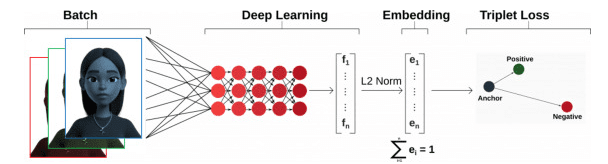
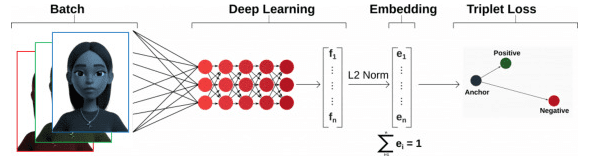

`Batch` - Các ảnh đầu vào, thường là ảnh khuôn mặt của nhiều người, được đưa vào theo từng lô (batch) để xử lý.

`Deep Learning` - Dữ liệu ảnh được truyền qua một mạng neural sâu, nơi các `đặc trưng` của ảnh được `trích xuất` thông qua các lớp học và trọng số của mạng.

`Embedding` - Dữ liệu ảnh được truyền qua một mạng neural sâu, nơi các đặc trưng của ảnh được trích xuất thông qua các lớp học và trọng số của mạng.
- Thường được dùng để so sánh với khuôn mặt khác trong cơ sở dữ liệu

`L2 Norm` -  Đây là một phép toán `chuẩn hóa` vector embedding, giúp chuẩn hóa các đặc trưng thành các vector có độ dài chuẩn hóa (l2 norm) để so sánh dễ dàng hơn.

`Triplet Loss` -  Phương pháp này được sử dụng để huấn luyện mạng sao cho khoảng cách giữa ảnh `"Anchor"` (khuôn mặt mục tiêu) và ảnh `"Positive"` (khuôn mặt tương tự) `càng nhỏ càng tốt`, trong khi khoảng cách giữa ảnh `"Anchor"` và ảnh `"Negative"` (khuôn mặt khác) phải `lớn`.

#### `Cấu trúc chính của FaceNet`

`1`. `CNN` - extracts feature

Phần đầu tiên của FaceNet là một mạng nơ-ron tích chập (CNN) được thiết kế để `trích xuất các đặc trưng` từ hình ảnh khuôn mặt. Mạng này bao gồm `nhiều lớp tích chập` (convolutional layers) và `lớp gộp`(pooling layers) để `học các đặc trưng hình học` và `phong cách của khuôn mặt`.

`Cấu trúc điển hình CNN trong FaceNet`

- `Convolutional Layer`: Các lớp này giúp `phát hiện` các `đặc trưng cơ bản` của hình ảnh, như cạnh và kết cấu. Vd: Lớp Conv1 có thể có 64 kênh đầu ra với kích thước 7x7

- `Pooling Layer`: Các lớp này giảm kích thước không gian của hình ảnh đầu vào, giúp `giảm số lượng tham số và tính toán`, đồng thời `giữ lại` các đặc trưng quan trọng
    - Pooling layer thường sử dụng maxpooling với kernel (3x3)

- `Batch Normalization Layer`: Lớp này giúp `chuẩn hóa đầu ra` của các lớp tích chập, giảm thiểu sự `thay đổi phân phối` trong quá trình huấn luyện

- `Activation Layer`: Thường được sử dụng để `áp thêm tính phi tuyến` vào mô hình, giúp mô hình học các đặc trưng phức tạp hơn

`Ví dụ minh họa`

`Input Image` -> `Conv1` (64 filter, 7x7) -> `ReLU` -> `MaxPool` (3x3) -> `Conv2` (128 filter, 3x3) -> `ReLU` -> `MaxPool` (3x3)


`2`. `Fully Connected Layer` - mapping feature

Sau khi các đặc trưng được trích xuất bởi các lớp CNN, chúng được đưa qua các lớp `fully connected (FC)` để `ánh xạ các đặc trưng` này thành `vector embedding` có độ dài cố định.

- Các lớp FC thường được thiết kế để giảm dần số lượng kích thước đặc trưng từ các lớp tích chập xuống một kích thước nhỏ hơn, thường là 128 hoặc 512 chiều cho vector embedding.

Cấu trúc lớp FC có thể như sau:

`Flatten` -> `FC1` (1024 units) -> `ReLU` -> `FC2` (Embedding Dim)
- Embedding Dim: Kích thước vector đặc trưng

`3`. `Loss function - Triplet Loss`

Mục tiêu của Triplet Loss là đảm bảo rằng `khoảng cách` giữa vector đặc trưng của một khuôn mặt (gọi là `Anchor`) và một khuôn mặt khác của cùng một người (gọi là `Positive`) phải `nhỏ hơn` `khoảng cách` giữa `vector đặc trưng của khuôn mặt đó` và khuôn mặt của một người khác (gọi là `Negative`)
$$
\mathcal{L} = \sum_{i=1}^{N} \left[ \| f(x_i^A) - f(x_i^P) \|_2^2 - \| f(x_i^A) - f(x_i^N) \|_2^2 + \alpha \right]_+
$$
`Trong đó:`

- $\text x_i^A$: Hình ảnh Anchor - ảnh gốc

- $\text x_i^P$: Hình ảnh Positive - giống `anchor`

- $\text x_i^N$: Hình ảnh Negative - khác `anchor`

- $\text f(x)$: Hàm ánh xạ đầu vào thành vector đặc trưng

- $\alpha$: Biên an toàn (margin)

- $\text []_+$: Hàm ReLU: giữ giá trị dương, cắt âm về 0

`Khoảng cách` giữa `Anchor và Positive` `<` `Khoảng cách` giữa `Anchor và Negative` `ít nhất` là một lượng bằng $\alpha$. Điều này giúp mô hình học cách phân biệt rõ ràng giữa các khuôn mặt khác nhau. 

Hàm Triplet Loss dựa trên việc điều chỉnh ba hình ảnh: Anchor (A), Positive (P), và Negative (N). Mục tiêu của mô hình là học sao cho:
$$
\| f(x_i^A) - f(x_i^P) \|_2^2 + \alpha < \| f(x_i^A) - f(x_i^N) \|_2^2
$$

Trong đó: 

- $\| \cdot \|_2^2$: Khoảng cách Euclide giữa các vector đặc trưng. 

Ta có thể hiểu là ta muốn $\text d_{AP}$ `càng nhỏ` - hai ảnh cùng một mục tiêu càng giống nhau và ngược lại $\text d_{AN}$ `càng lớn` - hai ảnh hai mục tiêu khác nhau thì nó càng lớn đảm bảo hơn $\text d_{AP} + \alpha$.

Trong hàm Triplet $\alpha$ là số luôn dương

`Trường hợp 1`: $d_{AP} - d_{AN} + \alpha > 0$

- Khi $\text d_{AP} - d_{AN} > 0$ có nghĩa là $\text d_A và d_N$ đang rất nhỏ => sai về ý tưởng bài toán vì ta đang muốn $\text d_A và d_P$ nhỏ mới đúng. Nên khi ta `cộng` thêm $\alpha$ sẽ khiến loss > $\alpha$ => `loss > 0`

=> Ta cần phải phạt để tinh chỉnh lại models

`Trường hợp 2`: $d_{AP} - d_{AN} + \alpha \leq 0$

- Đây là trường hợp ngược lại của trường hợp trên sẽ làm `loss = 0` => Không cần phải tinh chỉnh lại

Như vậy ta thấy được khi điều kiện của hàm loss không còn được thõa mãn nữa thì ta sẽ phải điều chỉnh lại models để làm giảm loss và làm có các vector di chuyển theo hướng gần xa tuy theo nhu cầu 

`4`. `Data Augmentation`

Overfitting trong Face Recognition thường do: thiếu dữ liệu đa dạng (góc nhìn, ánh sáng, biểu cảm, ...), class ít (quá ít người), không augmentation , mạng quá phức tạp, hoặc dùng loss không phù hợp.

Để cải thiện khả năng tổng quát của mô hình và giảm hiện tượng overfitting, các kỹ thuật tăng cường dữ liệu thường được sử dụng.

- Chuyển đổi màu sắc: Độ sáng, tương phản, bão hòa của hình ảnh

- Biến dạng hình học: Xoay, cắt, thay đổi kích thước của hình ảnh

- Làm mờ và nhiễu: Thêm nhiễu hoặc làm mờ hình ảnh để làm cho mô hình mạnh mẽ hơn với các điều kiện không giống như trong dữ liệu huấn luyện.

=> giúp mô hình có thể phản ứng với những thay đổi nhỏ của dữ liệu

In [4]:
# Tăng cường dữ liệu bằng pytorch
import torchvision.transforms as transforms
from PIL import Image

# Định nghĩa các kỹ thuật tăng cường dữ liệu
transform = transforms.Compose([
    transforms.Resize((128, 128)),          # Thay đổi kích thước hình ảnh
    transforms.RandomRotation(degrees=30),  # Xoay hình ảnh ngẫu nhiên trong phạm vi 30 độ
    transforms.RandomHorizontalFlip(),       # Lật ngang hình ảnh với xác suất 0.5
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Thay đổi màu sắc
    transforms.ToTensor()                    # Chuyển đổi hình ảnh thành tensor
])

# Tải và áp dụng các kỹ thuật tăng cường dữ liệu lên một hình ảnh
image = Image.open('/home/qk/Documents/python/python_programming/pytorch/input/image.png')
augmented_image = transform(image)

`transforms.Resize`: Thay đổi kích thước hình ảnh để có kích thước đồng nhất.

`transforms.RandomRotation`: Xoay hình ảnh một cách ngẫu nhiên trong phạm vi góc cho phép.

`transforms.RandomHorizontalFlip`: Lật ngang hình ảnh với xác suất 0.5.

`transforms.ColorJitter`: Thay đổi các thuộc tính màu sắc của hình ảnh như độ sáng, độ tương phản, bão hòa và sắc thái.

`transforms.ToTensor`: Chuyển đổi hình ảnh thành tensor, điều này là cần thiết cho việc đưa dữ liệu vào mô hình học máy trong PyTorch.

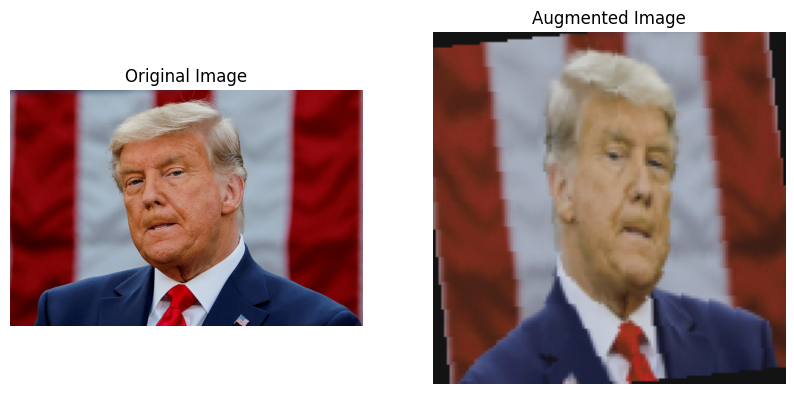

In [7]:
# Hiển thị hình ảnh gốc và hình ảnh đã tăng cường
import matplotlib.pyplot as plt

def show_image(image, title):
    plt.imshow(image.permute(1, 2, 0))  # Chuyển đổi tensor thành định dạng hình ảnh
    plt.title(title)
    plt.axis('off')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
show_image(transforms.ToTensor()(image), 'Original Image')

plt.subplot(1, 2, 2)
show_image(augmented_image, 'Augmented Image')

plt.show()

Bằng cách áp dụng các kỹ thuật tăng cường dữ liệu này, ta có thể cải thiện khả năng tổng quát của mô hình và giúp nó hoạt động tốt hơn trên dữ liệu thực tế với các biến thể khác nhau.

### `II`. `Triển khai và ứng dụng FaceNet`

`1`. `Triển khai FaceNet bằng Pytorch`

Ta sẽ định nghĩa một mô hình FaceNet đơn giản bao gồm một mạng tích chập (convolutional network) và các lớp fully connected để ánh xạ hình ảnh đầu vào thành vector embedding.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Định nghĩa mô hình FaceNet
class FaceNet(nn.Module):
    def __init__(self, embedding_dim=128):
        super(FaceNet, self).__init__()
        # Phần CNN
        self.convnet = nn.Sequential(
            # conv1: 3 kênh đầu vào (ảnh RGB), 64 kênh đầu ra
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            # Chuẩn hóa các feature map từ conv1
            nn.BatchNorm2d(64),
            # Hàm kích hoạt
            nn.ReLU(),
            # pool1: lấy giá trị lớn nhất trong vùng 3x3, stride = 2
            nn.MaxPool2d(3, stride=2),
            # conv2: 64 kênh đầu vào, 192 kênh đầu ra
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192), # tương tự
            nn.ReLU(), # tương tự
            nn.MaxPool2d(3, stride=2) # tương tự
        )
        # Phần FC
        self.fc = nn.Sequential(
            # Flatten từ feature map có kích thước 192x6x6 -> output 1024 chiều
            nn.Linear(192 * 6 * 6, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            # Biến vector từ 1024 thành vector có kích thước embedding
            nn.Linear(1024, embedding_dim)
        )
    
    def forward(self, x):
        x = self.convnet(x)
        x = x.view(x.size(0), -1) # Biến đổi từ 4D thành 2D
        x = self.fc(x)
        return x

# Khởi tạo mô hình
model = FaceNet(embedding_dim=128)

`2`. `Training model with Triplet Loss`

In [11]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = torch.norm(anchor - positive, p=2, dim=1)
        distance_negative = torch.norm(anchor - negative, p=2, dim=1)
        losses = torch.relu(distance_positive - distance_negative + self.margin)
        return torch.mean(losses)

# Khởi tạo hàm mất mát và trình tối ưu hóa
triplet_loss = TripletLoss(margin=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
def train(model, dataloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data in dataloader:
            anchor, positive, negative = data
            optimizer.zero_grad()

            # Forward pass
            anchor_embedding = model(anchor)
            positive_embedding = model(positive)
            negative_embedding = model(negative)

            # Tính toán mất mát
            loss = criterion(anchor_embedding, positive_embedding, negative_embedding)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")

# Ví dụ về dữ liệu (cần chuẩn bị trước)
# dataloader = DataLoader(...)

# Huấn luyện mô hình
# train(model, dataloader, triplet_loss, optimizer)

`Tóm tắt` - “Cho anchor, positive, negative vào mạng → lấy embedding → tính Triplet Loss → tối ưu Adam đến khi loss đủ thấp.”

`ỨNG DỤNG`

`Nhận diện khuôn mặt`: FaceNet có thể được sử dụng để nhận diện khuôn mặt trong các hệ thống bảo mật và nhận diện danh tính. Ví dụ, hệ thống nhận diện khuôn mặt trong các sân bay hoặc ngân hàng.

`Xác thực khuôn mặt`: Trong các hệ thống xác thực bảo mật, FaceNet có thể xác nhận xem một khuôn mặt có khớp với danh tính đã biết trước hay không, ví dụ như trong việc mở khóa điện thoại di động bằng nhận diện khuôn mặt.

`Tìm kiếm khuôn mặt`: FaceNet có thể giúp tìm kiếm khuôn mặt trong một cơ sở dữ liệu lớn. Ví dụ, trong các hệ thống giám sát công cộng, nó có thể tìm kiếm và nhận diện các cá nhân từ các video an ninh.

`Nhóm khuôn mặt`: FaceNet có thể phân loại và nhóm các khuôn mặt thành các nhóm khác nhau dựa trên sự tương đồng. Ví dụ, trong các ứng dụng quản lý hình ảnh, nó có thể giúp nhóm các bức ảnh của cùng một người lại với nhau.